In [31]:
#lasso regression for feature selection
import pandas as pd
df=pd.read_csv("data_updated230524_new_excludedIHC_excludedNaN_processedV2_forpairwise-analysis.txt",sep="\t")

In [32]:
df1=pd.concat([df.iloc[:, 0], df.iloc[:, 7:10],df.iloc[:, 11:15], df.iloc[:, 18],df.iloc[:, 22:]], axis=1)

In [33]:
df1["Batch"] = df1["Batch"].replace("Batch_1", 1)
df1["Batch"] = df1["Batch"].replace("Batch_2", 2)

In [34]:
#dropped cibersort columns that are not good. only kept 3/22 :
#'C_Bcellsnaive', 'C_TcellsCD4memoryresting','C_MacrophagesM2'
df1=df1.drop(columns=['C_Bcellsmemory','C_Plasmacells','C_TcellsCD8','C_TcellsCD4naive',
         'C_TcellsCD4memoryactivated','C_Tcellsfollicularhelper',
         'C_Tcellsregulatory(Tregs)','C_Tcellsgammadelta','C_NKcellsresting',
         'C_NKcellsactivated', 'C_Monocytes', 'C_MacrophagesM0',
         'C_MacrophagesM1','C_Dendriticcellsresting',
         'C_Dendriticcellsactivated', 'C_Mastcellsresting',
         'C_Mastcellsactivated','C_Eosinophils', 'C_Neutrophils'])

In [5]:
#save batch 1 and batch2 separately
df1_b1=df1[df1['Batch'] == 'Batch_1']
df1_b2=df1[df1['Batch'] == 'Batch_2']

In [36]:
# #perfor-z-transformation on 'batch' column - this is for my later attempt of including batch in lasso regression
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform z-transformation on the 'BinaryColumn'
scaler.fit_transform(df1[['Batch']])

In [38]:
#total 125 columns, extract column 10 onwards i.e. the 116 IS , save them as a list for iteration of 116X later
immune_scores=list(df1.columns[9:])

In [46]:
print(df1['Batch'].max())
print(df1['Batch'].min())
print(df1['HR_status'].max())
print(df1['HR_status'].min())
print(df1['HER_status'].max())
print(df1['HER_status'].min())

1.4126688174419815
-0.7078799982367914
0.740629956
-1.350201936
1.485128774
-0.673342283


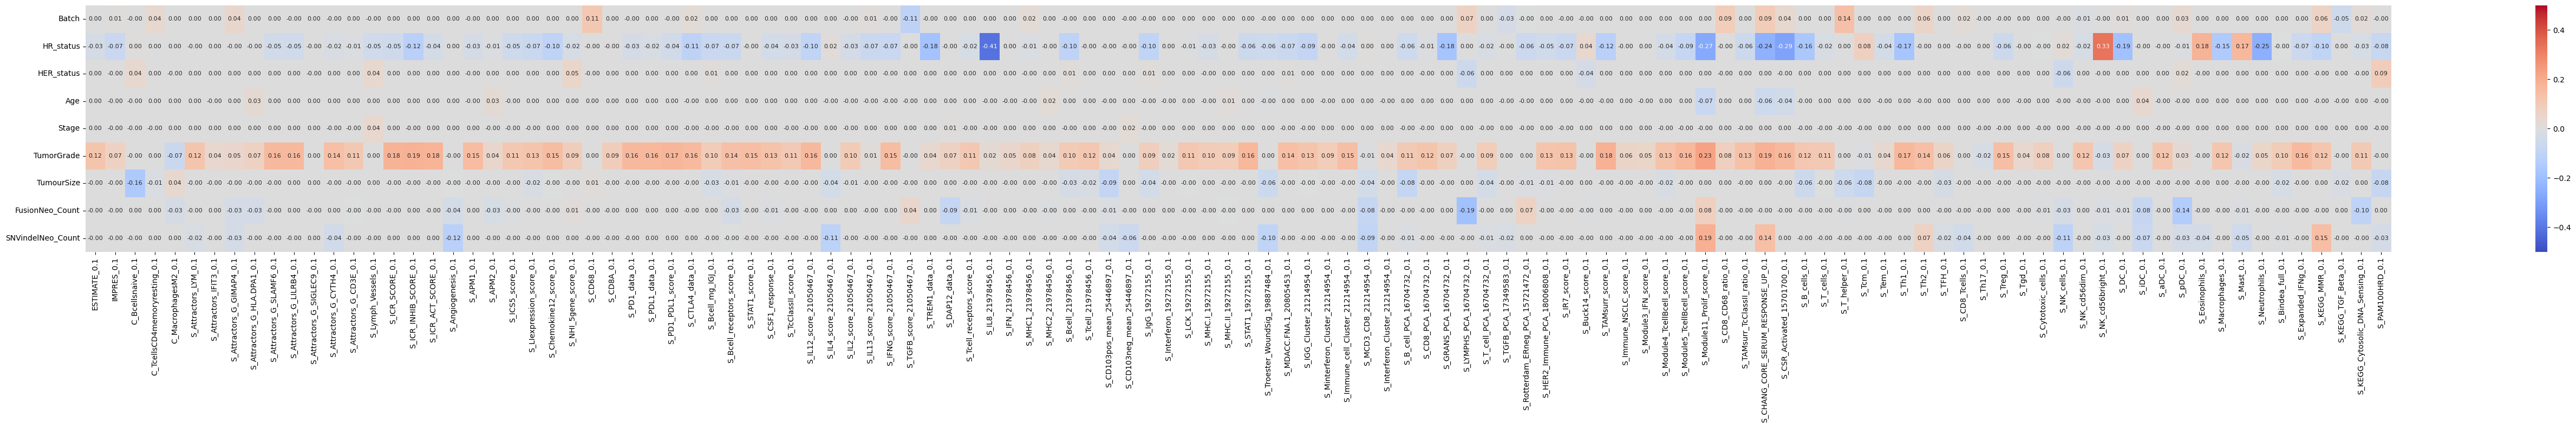

In [41]:
#from previous testing - we decided to only stick with alpha=0.1
#perform this for batch1 first

#define the independent variables for regression
X1 = df1[['Batch','HR_status', 'HER_status', 'Age', 'Stage', 'TumorGrade','TumourSize', 'FusionNeo_Count', 'SNVindelNeo_Count']]

# ROUND1: Selecting predictor and response variables
mses={}
coefs={}
y_preds={}
y_tests={}

# alphas=[0.01, 0.0325, 0.055, 0.0775, 0.1]
# alphas_dict={0.01:"0.01", 0.0325:"0.0325", 0.055:"0.055", 0.0775:"0.0775", 0.1:"0.1"}
# alphas=[0.08,0.1]
# alphas_dict={0.08:"0.08",0.1:"0.1"}
alphas=[0.1]
alphas_dict={0.1:"0.1"}

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

for score in immune_scores:
    y1 = df1[score]  # dependent variable
    
    # Split data into training and test sets
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

    for alpha_value in alphas:
        # Create a Lasso regression model
        lasso = Lasso(alpha=alpha_value)  # alpha is the regularization parameter

        # Fit the model to the training data
        lasso.fit(X1_train, y1_train)

        # Make predictions on the test data
        y1_pred = lasso.predict(X1_test)

        # Evaluate the model
        mse = mean_squared_error(y1_test, y1_pred)
        
        #saving the values for comparision in a table later
        num=alphas_dict[alpha_value]
        mses[f'{score}_{num}']=mse
        coefs[f'{score}_{num}']=lasso.coef_
        y_preds[f'{score}_{num}']=y1_pred
        y_tests[f'{score}_{num}']=y1_test
        
coef_output_b1=pd.DataFrame(coefs, index=list(X1.columns))
# visualise the coef across all 116 IS using heatmap!
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create the heatmap
plt.figure(figsize=(55,8))  # Adjust the size of the figure as needed
sns.heatmap(coef_output_b1, cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5, annot=True, annot_kws={"size": 8},fmt=".2f")

# Display the heatmap
plt.tight_layout()
# plt.savefig('lasso_b1.png',dpi=600)
plt.show()

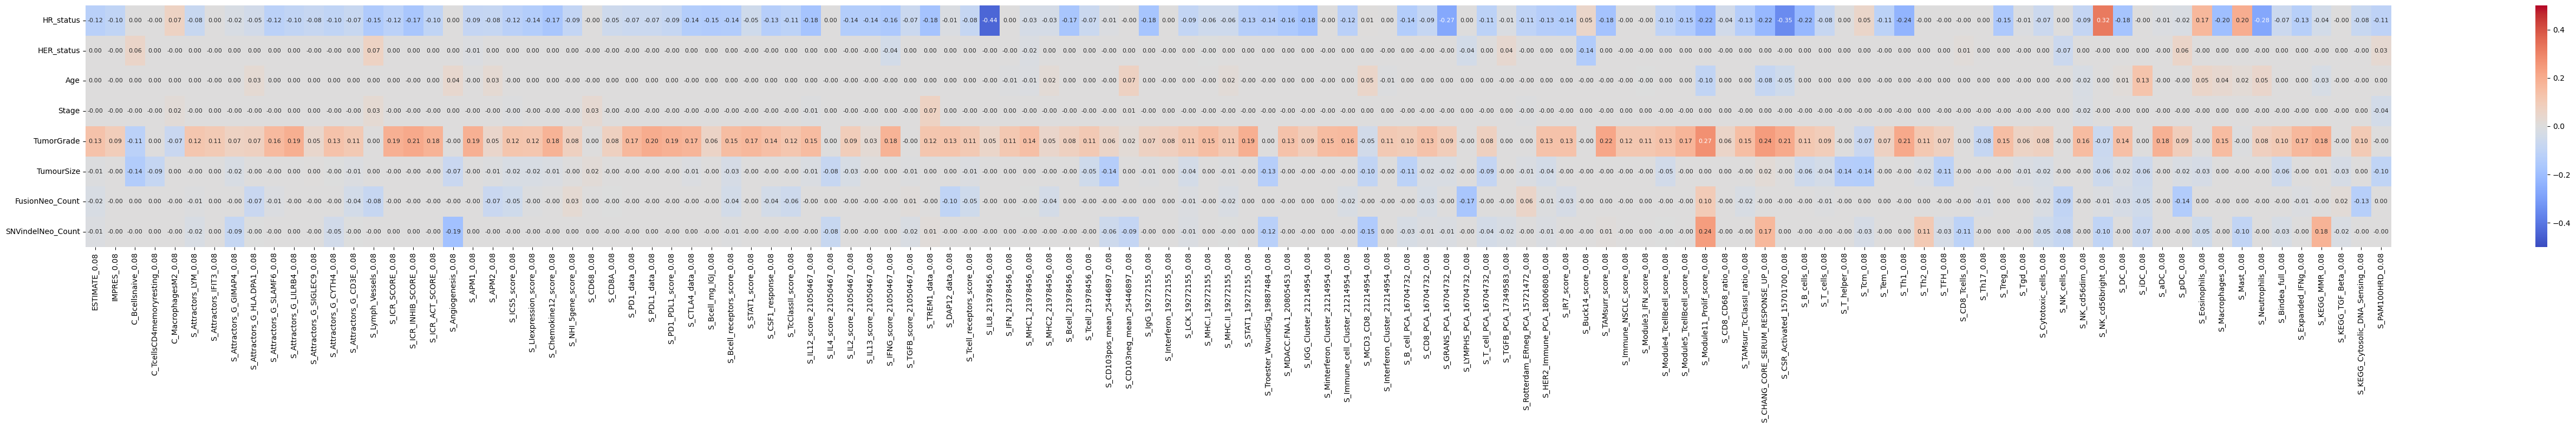

In [17]:
# visualise the coef across all 116 IS using heatmap!
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create the heatmap
plt.figure(figsize=(55,8))  # Adjust the size of the figure as needed
sns.heatmap(coef_output_b1.filter(regex=f'_0.08$'), cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5, annot=True, annot_kws={"size": 8},fmt=".2f")

# Display the heatmap
plt.tight_layout()
# plt.savefig('lasso_b1.png',dpi=600)
plt.show()

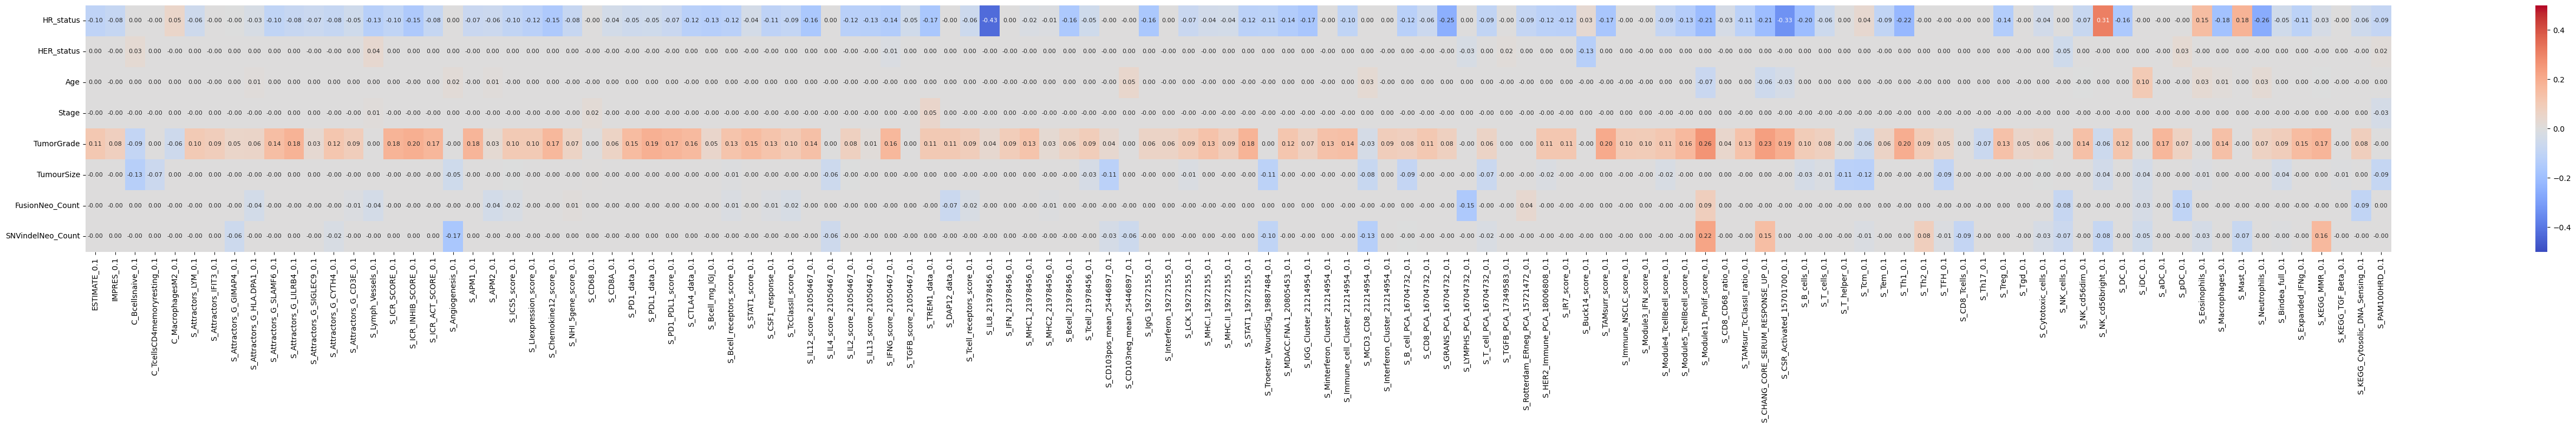

In [18]:
# visualise the coef across all 116 IS using heatmap!
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create the heatmap
plt.figure(figsize=(55,8))  # Adjust the size of the figure as needed
sns.heatmap(coef_output_b1.filter(regex=f'_0.1$'), cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5, annot=True, annot_kws={"size": 8},fmt=".2f")

# Display the heatmap
plt.tight_layout()
# plt.savefig('lasso_b1.png',dpi=600)
plt.show()

In [22]:
#now perform this for batch 2
#from previous testing - we decided to only stick with alpha=0.1
#define the independent variables for regression
X1 = df1_b2[['HR_status', 'HER_status', 'Age', 'Stage', 'TumorGrade','TumourSize', 'FusionNeo_Count', 'SNVindelNeo_Count']]

# ROUND1: Selecting predictor and response variables
mses={}
coefs={}
y_preds={}
y_tests={}

alphas=[0.08,0.1]
alphas_dict={0.08:"0.08",0.1:"0.1"}

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# scores=['zESTIMATE']
for score in immune_scores:
    y1 = df1_b2[score]  # dependent variable
    
    # Split data into training and test sets
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

    for alpha_value in alphas:
        # Create a Lasso regression model
        lasso = Lasso(alpha=alpha_value)  # alpha is the regularization parameter

        # Fit the model to the training data
        lasso.fit(X1_train, y1_train)

        # Make predictions on the test data
        y1_pred = lasso.predict(X1_test)

        # Evaluate the model
        mse = mean_squared_error(y1_test, y1_pred)
        
        #saving the values for comparision in a table later
        num=alphas_dict[alpha_value]
        mses[f'{score}_{num}']=mse
        coefs[f'{score}_{num}']=lasso.coef_
        y_preds[f'{score}_{num}']=y1_pred
        y_tests[f'{score}_{num}']=y1_test
        
coef_output_b2=pd.DataFrame(coefs, index=list(X1.columns))

# #visualise the coef across all 116 IS using heatmap!
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame
# # Create the heatmap
# plt.figure(figsize=(55,8))  # Adjust the size of the figure as needed
# sns.heatmap(coef_output_b2, cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5, annot=True, annot_kws={"size": 8},fmt=".2f")

# # Display the heatmap
# plt.tight_layout()
# # plt.savefig('lasso_b2.png',dpi=600)
# plt.show()

In [23]:
coef_output_b2

,ESTIMATE_0.08,ESTIMATE_0.1,IMPRES_0.08,IMPRES_0.1,C_Bcellsnaive_0.08,C_Bcellsnaive_0.1,C_TcellsCD4memoryresting_0.08,C_TcellsCD4memoryresting_0.1,C_MacrophagesM2_0.08,C_MacrophagesM2_0.1,...,S_Expanded_IFNg_0.08,S_Expanded_IFNg_0.1,S_KEGG_MMR_0.08,S_KEGG_MMR_0.1,S_KEGG_TGF_Beta_0.08,S_KEGG_TGF_Beta_0.1,S_KEGG_Cytosolic_DNA_Sensing_0.08,S_KEGG_Cytosolic_DNA_Sensing_0.1,S_PAM100HRD_0.08,S_PAM100HRD_0.1
HR_status,0.000000,0.000000,-0.000000,-0.000000,0.002458,0.000000,0.030447,0.012329,0.000000,0.000000,...,0.000000,0.000000,-0.170439,-0.156371,0.080686,0.061800,-0.000000,-0.000000,-0.055155,-0.036893
HER_status,0.000000,0.000000,-0.000000,-0.000000,0.073116,0.053361,-0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,-0.005288,-0.000000,0.014787,0.000000,-0.004980,-0.000000,0.271085,0.257181
Age,0.000000,-0.000000,-0.079433,-0.062393,-0.000000,-0.000000,-0.005315,-0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
Stage,0.000000,0.000000,0.000000,0.000000,-0.028411,-0.015786,-0.000000,-0.000000,0.003728,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.058145,0.037471,-0.000000,-0.000000
TumorGrade,0.187325,0.167352,0.133960,0.114221,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.205859,0.186489,0.130876,0.114096,-0.035501,-0.019261,0.150625,0.130908,-0.000000,-0.000000
TumourSize,-0.000000,-0.000000,-0.000000,-0.000000,-0.160954,-0.150267,-0.038820,-0.019884,0.083882,0.062679,...,-0.000000,-0.000000,0.047093,0.030261,-0.009563,-0.000000,0.000000,0.000000,-0.135834,-0.116392
FusionNeo_Count,0.000000,0.000000,0.003073,0.000000,-0.000000,-0.000000,0.001790,0.000000,-0.042269,-0.009487,...,0.002982,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
SNVindelNeo_Count,-0.172304,-0.152990,-0.075024,-0.057535,-0.035049,-0.018706,0.001725,0.000000,0.000000,0.000000,...,-0.056420,-0.036480,0.196346,0.179987,-0.000000,-0.000000,-0.092300,-0.071391,-0.151975,-0.133133


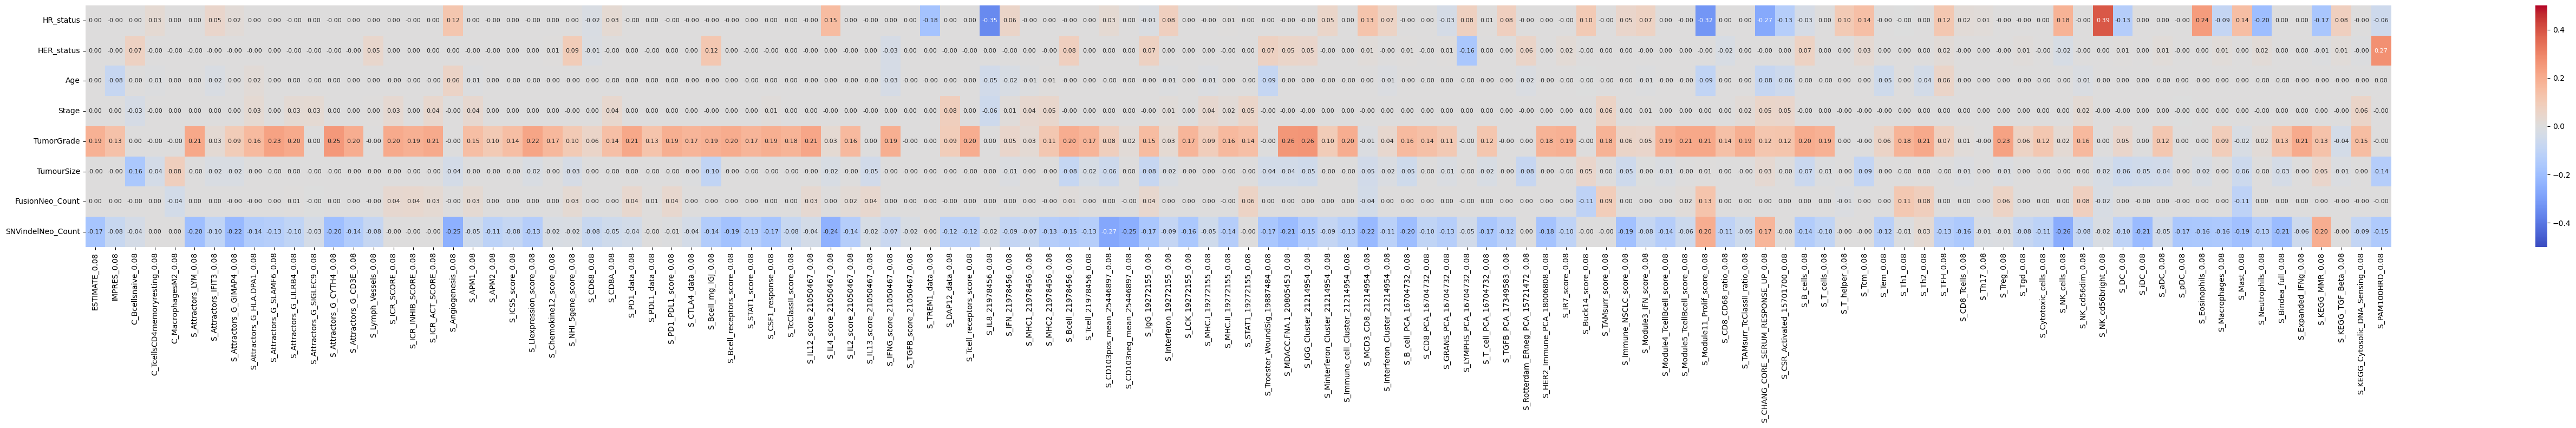

In [24]:
# visualise the coef across all 116 IS using heatmap!
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create the heatmap
plt.figure(figsize=(55,8))  # Adjust the size of the figure as needed
sns.heatmap(coef_output_b2.filter(regex=f'_0.08$'), cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5, annot=True, annot_kws={"size": 8},fmt=".2f")

# Display the heatmap
plt.tight_layout()
# plt.savefig('lasso_b1.png',dpi=600)
plt.show()

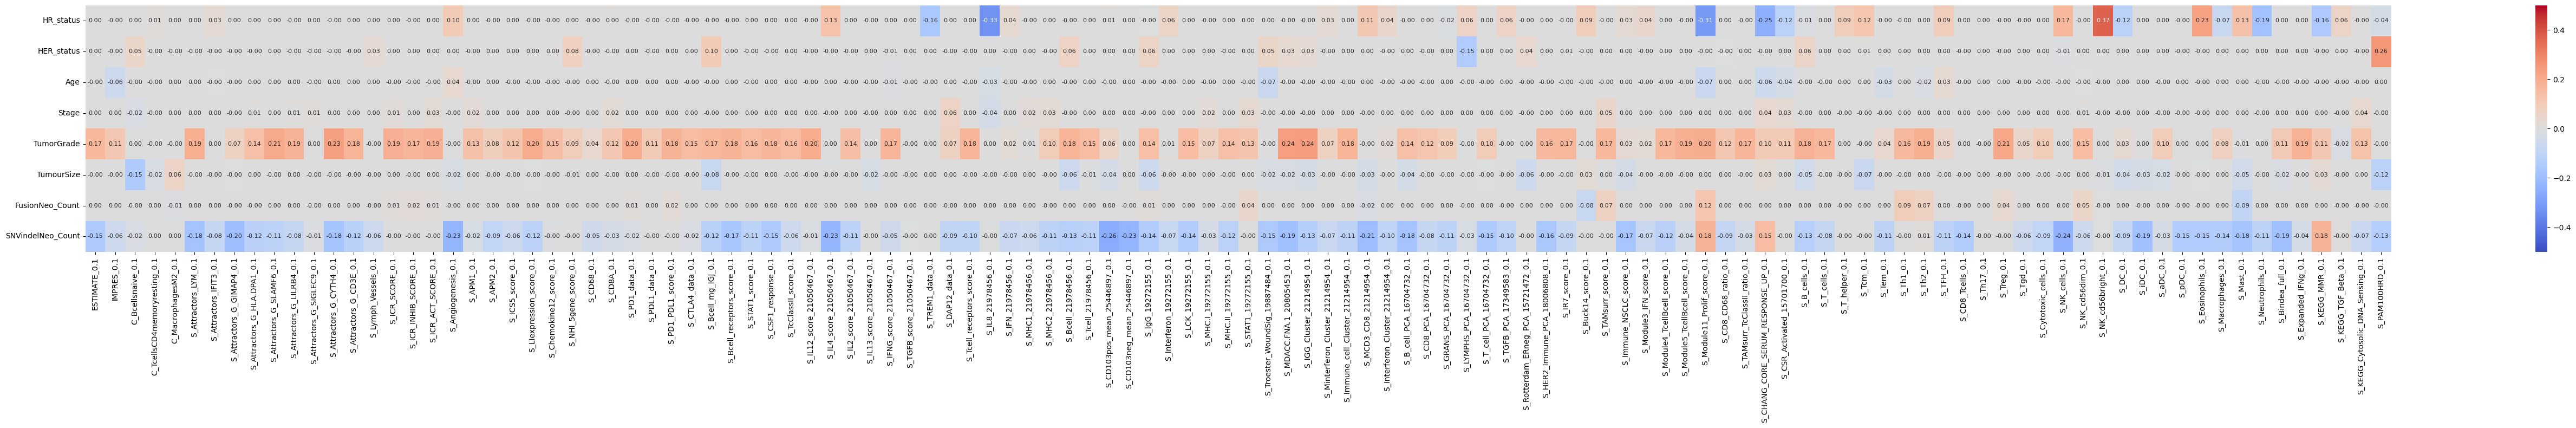

In [25]:
# visualise the coef across all 116 IS using heatmap!
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create the heatmap
plt.figure(figsize=(55,8))  # Adjust the size of the figure as needed
sns.heatmap(coef_output_b2.filter(regex=f'_0.1$'), cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5, annot=True, annot_kws={"size": 8},fmt=".2f")

# Display the heatmap
plt.tight_layout()
# plt.savefig('lasso_b1.png',dpi=600)
plt.show()

In [143]:
#extract the IS that has != 0 value for neoantigen counts (fusion or SNV)
fusion_common=[element for element in coef_output_b1.loc['FusionNeo_Count'][coef_output_b1.loc['FusionNeo_Count'] != 0].index.tolist() if element in coef_output_b2.loc['FusionNeo_Count'][coef_output_b2.loc['FusionNeo_Count'] != 0].index.tolist()]
snv_common=[element for element in coef_output_b1.loc['SNVindelNeo_Count'][coef_output_b1.loc['SNVindelNeo_Count'] != 0].index.tolist() if element in coef_output_b2.loc['SNVindelNeo_Count'][coef_output_b2.loc['SNVindelNeo_Count'] != 0].index.tolist()]
print (fusion_common)
print (snv_common)

['S_Module11_Prolif_score']
['S_Attractors_G_GIMAP4', 'S_Attractors_G_CYTH4', 'S_Angiogenesis', 'S_IL4_score_21050467', 'S_CD103pos_mean_25446897', 'S_CD103neg_mean_25446897', 'S_Troester_WoundSig_19887484', 'S_MCD3_CD8_21214954', 'S_B_cell_PCA_16704732', 'S_T_cell_PCA_16704732', 'S_Module11_Prolif_score', 'S_CHANG_CORE_SERUM_RESPONSE_UP', 'S_Th2', 'S_TFH', 'S_CD8_Tcells', 'S_Cytotoxic_cells', 'S_NK_cells', 'S_NK_cd56bright', 'S_iDC', 'S_Eosinophils', 'S_Mast', 'S_Bindea_full', 'S_KEGG_MMR']


In [157]:
#based on the outcome - will only generate dataframe for SNV common, since fusino only got ONE common between b1 and b2
snv_common_df=pd.DataFrame(coef_output_b1[snv_common].loc['SNVindelNeo_Count'])
snv_common_df.rename(columns={snv_common_df.columns[0]: 'Batch_1'}, inplace=True)
snv_common_df['Batch_2']=coef_output_b2[snv_common].loc['SNVindelNeo_Count'].tolist()

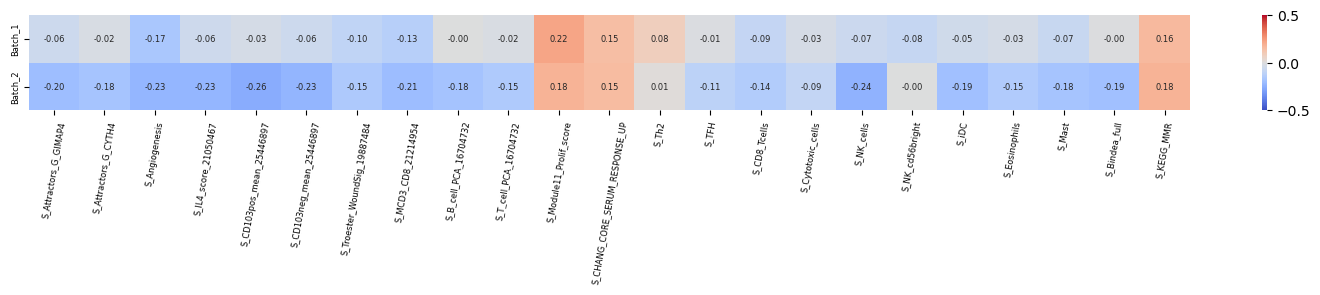

In [196]:
# Assuming 'df' is your DataFrame
# Create the heatmap
plt.figure(figsize=(15,3))  # Adjust the size of the figure as needed
sns.heatmap(snv_common_df.T, cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5, annot=True, annot_kws={"size": 6},fmt=".2f")

plt.xticks(fontsize=6,rotation=80)
plt.yticks(fontsize=6)
# Display the heatmap
plt.tight_layout()
plt.savefig('lasso_snv_common_b1b2.png',dpi=600)
plt.show()

In [170]:
len(snv_common_df)

23

In [138]:
list1=[1,2,3]
list2=[2,4,5]
list1 in list2

False

In [16]:
import pandas as pd

# Sample DataFrame
data = {
    'col1_suffix': [1, 2, 3],
    'col2_suffix': [4, 5, 6],
    'col3': [7, 8, 9],
    'suffix_col4': [10, 11, 12]
}
df = pd.DataFrame(data)

# Specify the suffix string
suffix = '_suffix'

# Use filter with regex to select columns ending with the suffix
filtered_df = df.filter(regex=f'{suffix}$')

print(filtered_df)


   col1_suffix  col2_suffix
0            1            4
1            2            5
2            3            6
